# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la'ie
Processing Record 2 of Set 1 | egilsstadir
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | krasnoshchekovo
Processing Record 7 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 8 of Set 1 | axum
Processing Record 9 of Set 1 | galle
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | yakeshi
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | mejit
Processing Record 17 of Set 1 | axim
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | woolgoolga
Processing Record

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [129]:
# Display sample data
# Adjust temperature from Kelvin to Celsius in new column
city_data_df['Max Temp C'] = city_data_df['Max Temp'] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
0,la'ie,21.6477,-157.9253,299.13,80,13,2.68,US,1720594111,25.98
1,egilsstadir,65.2653,-14.3948,283.10,76,0,1.03,IS,1720594112,9.95
2,yellowknife,62.4560,-114.3525,291.71,79,40,3.60,CA,1720594113,18.56
3,port-aux-francais,-49.3500,70.2167,278.21,93,100,16.10,TF,1720594114,5.06
4,thompson,55.7435,-97.8558,285.24,94,20,1.03,CA,1720594116,12.09


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
0,la'ie,21.6477,-157.9253,299.13,80,13,2.68,US,1720594111,25.98
1,egilsstadir,65.2653,-14.3948,283.10,76,0,1.03,IS,1720594112,9.95
2,yellowknife,62.4560,-114.3525,291.71,79,40,3.60,CA,1720594113,18.56
3,port-aux-francais,-49.3500,70.2167,278.21,93,100,16.10,TF,1720594114,5.06
4,thompson,55.7435,-97.8558,285.24,94,20,1.03,CA,1720594116,12.09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

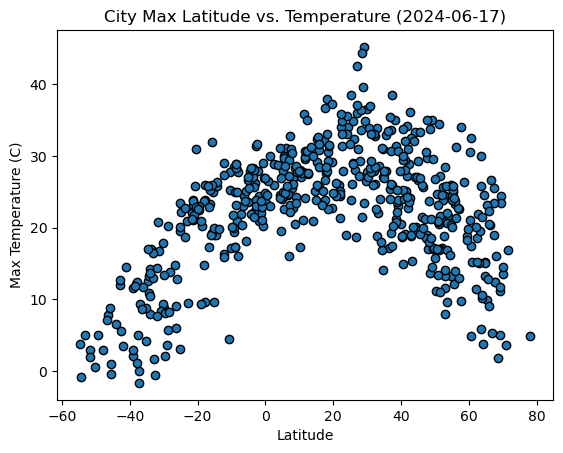

In [78]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp C'], edgecolor='black')
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

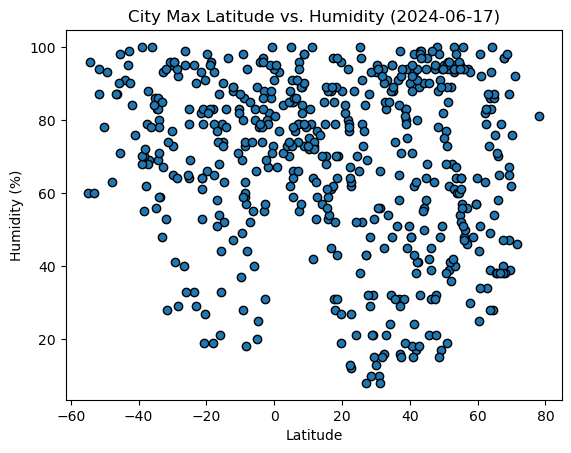

In [69]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')
plt.title('City Max Latitude vs. Humidity (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Incorporate the other graph properties
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

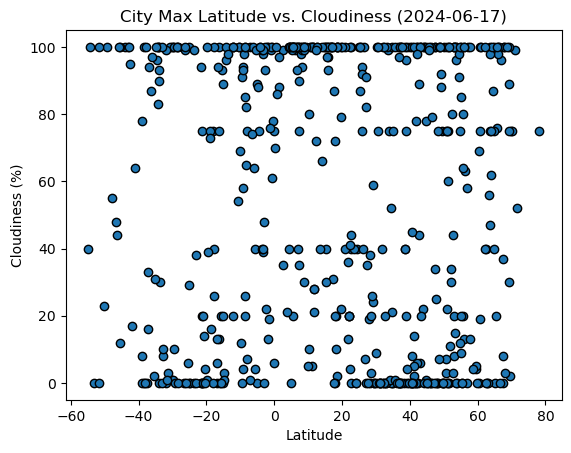

In [71]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')
plt.title('City Max Latitude vs. Cloudiness (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Incorporate the other graph properties
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

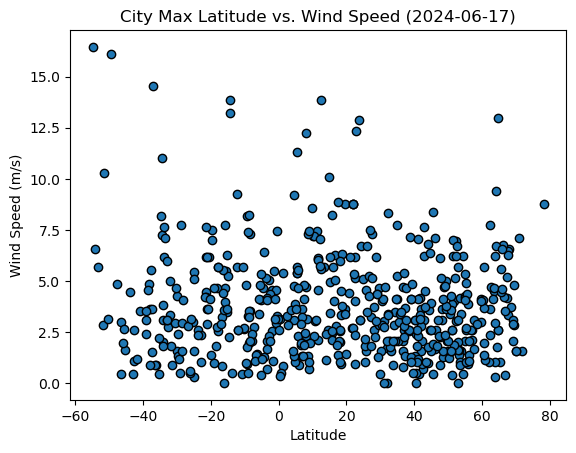

In [73]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')
plt.title('City Max Latitude vs. Wind Speed (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [131]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
0,la'ie,21.6477,-157.9253,299.13,80,13,2.68,US,1720594111,25.98
1,egilsstadir,65.2653,-14.3948,283.10,76,0,1.03,IS,1720594112,9.95
2,yellowknife,62.4560,-114.3525,291.71,79,40,3.60,CA,1720594113,18.56
4,thompson,55.7435,-97.8558,285.24,94,20,1.03,CA,1720594116,12.09
5,krasnoshchekovo,51.6708,82.7289,294.86,62,0,4.00,RU,1720594117,21.71


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,278.21,93,100,16.10,TF,1720594114,5.06
8,atafu village,-8.5421,-172.5159,302.03,73,85,7.31,TK,1720594122,28.88
9,grytviken,-54.2811,-36.5092,272.35,96,100,6.55,GS,1720594123,-0.80
16,bredasdorp,-34.5322,20.0403,285.79,83,96,7.25,ZA,1720594131,12.64
17,blackmans bay,-43.0167,147.3167,285.22,95,100,0.45,AU,1720594133,12.07


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.25719890281824387


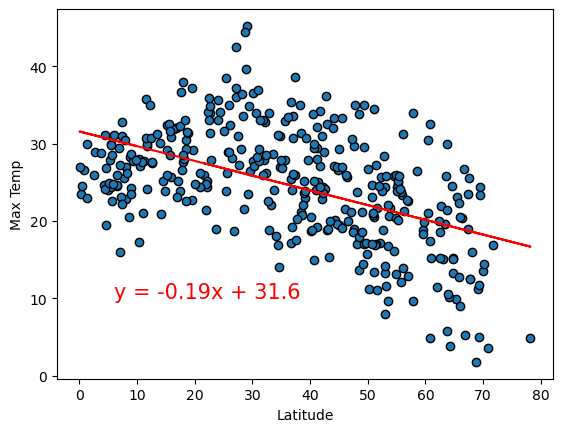

In [133]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

The r^2 value is: 0.6354042137928682


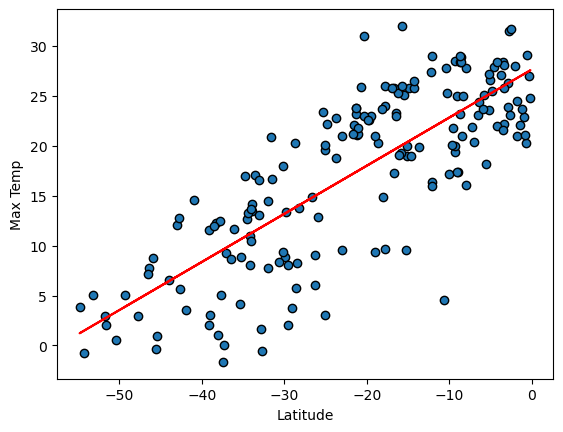

In [143]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

**Discussion about the linear relationship:** Although it may seem like the temperatures become colder the higher the latitude, the northern hemisphere does not show any strong correlation between latitude and max temperature. The r^2 value, 0.257, confirms that this correlation is very weak. However, we can see a little more of a trend in the southern hemisphere where the higher the latitude, the warmer max temperature is. The r^2 value, 0.635, shows us that this is a moderate correlation.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.00985606332351155


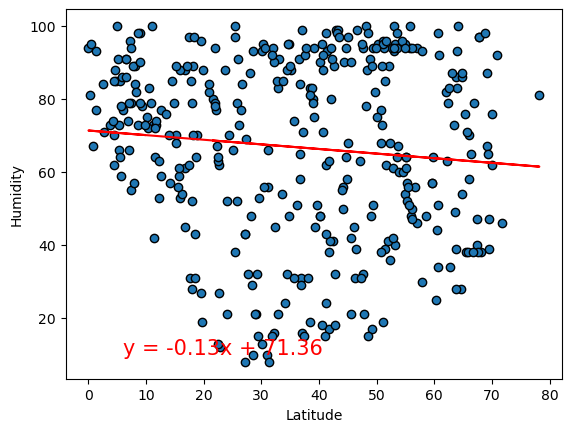

In [138]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

The r^2 value is: 0.019759913408929273


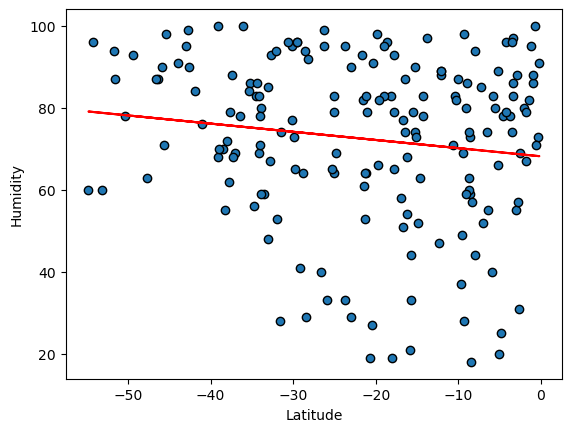

In [140]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

**Discussion about the linear relationship:** The relationship between humidity and latitude have no relationship in either the north or south hemispheres. The data is scattered throughout the entire graph, and both linear regression lines do not indicate a relationship. The r^2 value for both hemispheres (0.009 for north and 0.019 for south) show a very weak correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.02952583130184092


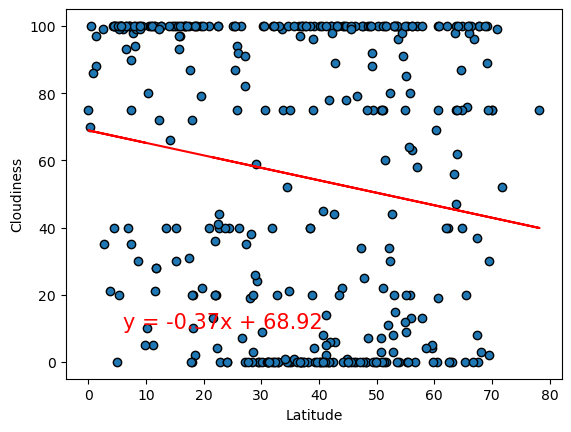

In [146]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

The r^2 value is: 0.005495074039102292


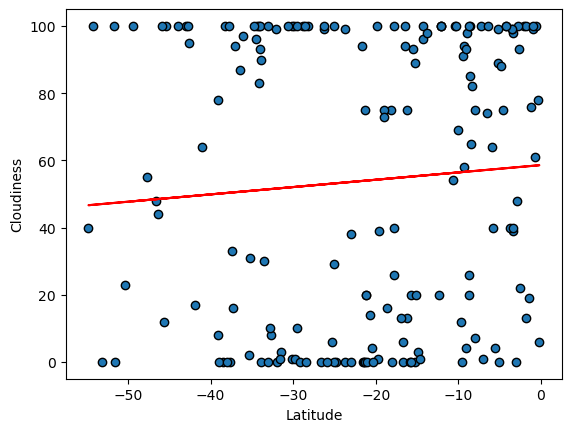

In [148]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

**Discussion about the linear relationship:** Both the northern and southern hemispheres seem to show greater amounts of cloudiness on extreme ends (either at 0 or 100) throughout any given latitude coordinate. However, this does not indicate any relationship between latitude and cloudiness. The linear regression line also lacks any indication of a relationship. This is confirmed with very low, weak r^2 values (0.029 for north and 0.005 for south).

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.009101208973535804


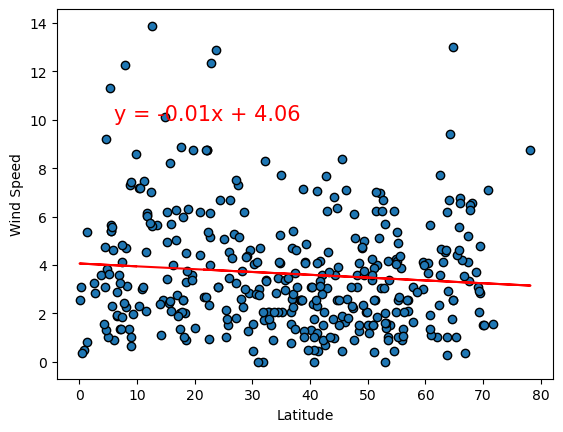

In [151]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

The r^2 value is: 0.013623431613941982


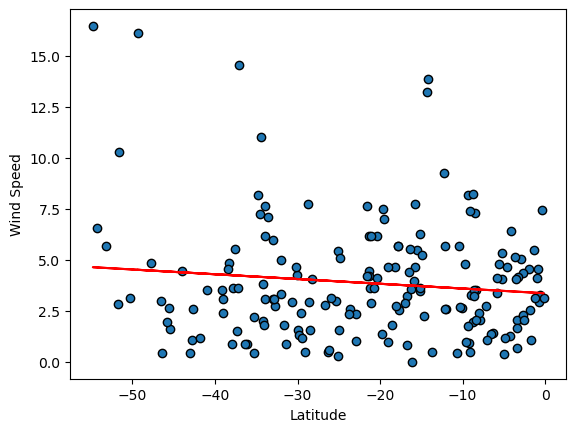

In [153]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create graph
plt.scatter(x_values, y_values, edgecolor='black')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r^2 value is: {rvalue**2}")

**Discussion about the linear relationship:** For both the north and south hemispheres, most of the data points seem to stay around the lower end of wind speeds for all latitude coordinates. However, the linear regression lines and r^2 values indicate that there is no correlation between the two variables (0.009 for north and 0.013 for south).